本章和第3章将介绍通过Python有效导入、存储和操作内存数据的主要技巧。这个主题非常广泛，因为数据集的来源于格式都十分丰富，比如文档集合、图像结合、声音片段集合、数值数据集合，等等。这些数据虽然存在明显的异构性，但是将所有数据简单地看作数据数组非常有助于我们理解和处理数据。   
例如，可以将图像(尤其是数字图像)简单地看作二维数字数组，这些数字数组代表个区域的像素值；声音片段可以看作时间和强度的一维数组；文本也可以通过各种方式转换成数值表示，一种可能得转换是用二进制表示特定单词或单词对出现的频率。不管数据是何种形式，第一步都是讲这些数据转换成数值数组形式的课分析数据(5.4节将更详细地介绍一些实现这种数据转换的示例)。   
正因如此，有效地存储和操作数值数组是数据科学中绝对的基础过程。我们将介绍Python中专门用来处理这些数值数组的工具：NumPy包和Pandas包(将在第3章介绍)。   
本章将详细介绍NumPy。NumPy(Numerical Python的简称)提供了高效存储和操作秘籍数据缓存的接口。在某些方面，NumPy数组与Python内置的列表类型非常相似。但是随着数组在维度上变大，NumPy数组提供了更加高效的存储和数据操作。NumPy数组几乎是整个Python数据科学工具生态系统的核心。因此，不管你对数据科学的哪个方面感兴趣，花点时间学习如何有效地使用NumPy都是非常值得的。   
如果你听从前言给出的建议安装了Anaconda，那么你已经安装好了NumPy，并可以使用它了。如果你是个体验派，则可以到NumPy网站(<http://www.numpy.org/>)按照其安装指导进行安装。安装好后，你可以导入NumPy并再次核实你的NumPy版本：

In [1]:
import numpy
numpy.__version__

'1.18.1'

针对本章中介绍的NumPy功能，我建议你使用NumPy1.8之后的版本。遵循传统，你将发现SciPy/PyData社区中的大多数人都用np作为别名导入NumPy：

In [3]:
import numpy as np

在本章以及之后的内容中，我们都将用这种方式导入和使用NumPy。

## 2.1 理解Python中的数据类型   

要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。本节将介绍在Python语言中数据数组是如何被处理的，并对比NumPy所做的改进。理解这个不同之处是理解本书其他内容的基础。   
Python的用户往往被其易用性所吸引，其中一个易用之处在于动态输入。静态类型的语言(如C何Java)往往需要每一个变量都明确滴声明，而动态类型的语言(例如Python)可以跳过这个特殊规定。例如在C语言中，你可能会按照如下方式制定一个特殊的操作：

而在Python中，同等的操作可以按照如下方式实现：

In [1]:
# Python代码
result = 0
for i in range(100):
    result += i

注意这里最大的不同之处：在C语言中，每个变量的数据类型被明确滴声明；而在Python中，类型是动态推断的。这意味着可以将任何类型的数据指定到任何变量：

In [1]:
#Python代码
x = 4
x = 'four'

这里以及将x变量的内容整型转变成了字符串，而同样的操作在C语言中将会导致(取决于编译器设置)编译错误或其他未知的后果：   

这种灵活性是使Python和其他动态类型的语言更易用的原因之一。理解这一特性如何工作是学习用Python有效且高效地分析数据的重要因素。但是这种类型灵活性也指出了一个事实：Python变量不仅是它们的值，还包括了关于值得类型的一些额外信息，本节接下来的内容将进行更详细的介绍。   

### 2.2.1 Python整型不仅仅是一个整型     

标准的Python实现是用C语言编写的。这意味着Python对象都是一个聪明的伪C语言结构体，该结构体不仅包含其值，还有其他信息。例如，当我们在Python中定义了一个整型，例如x = 10000时，x并不是一个"原生"整型，而是一个指针，指向C语言的负荷结构体，结构体里包含了一些值。查看Python3.4的源代码，可以发现整型(长整型)的定义，如下所示(C语言的宏经过扩展之后)：

Python3.4的一个整型实际上包括4个部分。   
* ob_refcnt是一个引用计数， 它帮助Python默默地处理内存的分配和回收。
* ob_type将变量的类型编码。
* ob_size指定接下来的数据成员的大小。
* ob_digit包含我们希望Python变量表示的实际整型值。   

这意味着与C语言中的整型相比，在Python中存储一个整型会有一些开销，正如图2-1所示。

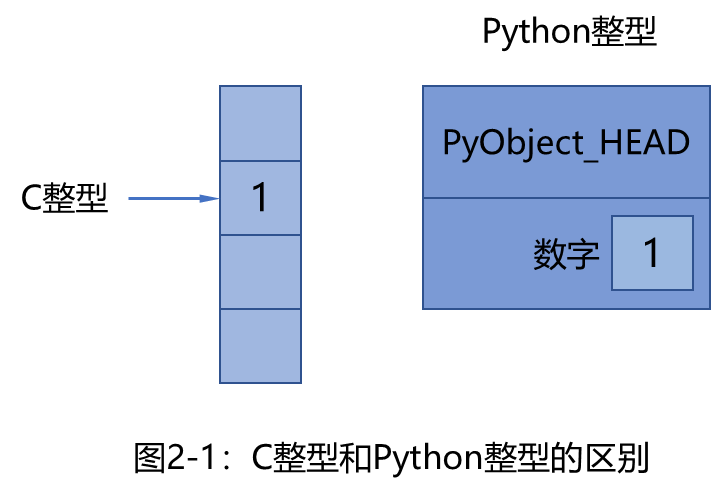

In [5]:
from IPython.display import Image
Image(filename = 'D:/graphs/Python Data Science Handbook/Chapter2/graph2-1.png', width = 450, height = 270)

这里PyObject_HEAD是结构体中包含引用计数、类型编码和其他之前提到内容的部分。   
两者的差异在于，C语言整型本质上是对应某个内存位置的标签，里面存储的字节会编码成整型。而Python的整型其实是一个指针，指向包含这个Python对象所有信息的某个内存位置，其中包含可以转换成整型的字节。由于Python的整型结构体里面还包含了大量额外的信息，所以Python可以自由、动态地编码。但是，Python类型中的这些额外信息也会成为负担，在多个对象组合的结构体中尤其明显。   

### 2.1.2 Python列表不仅仅是一个列表    

设想如果使用一个包含很多Python对象的Python数据结构，会发生什么？Python中的标准的可变多元素容器是列表。可以用如下方式创建一个整数值列表：

In [6]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
type(L[0])

int

或者创建一个字符串列表：

In [8]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
type(L2[0])

str

因为Python的动态类型特性，甚至可以创建一个异构的列表：

In [10]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

但是想拥有这种灵活性也是要付出一定代价的：为了获得这些灵活的类型，列表中的每一项必须包含各自的类型信息、引用计数和其他信息；也就是说，每一项都是一个完整Python。来看一个特殊的例子，如果列表中的所有变量都是同一类型的，那么很多信息都会显得多余——将数据存储在固定类型的数组中应该会更高效。动态类型的列表和固定类型的(NumPy式)数组间的区别如图2-2所示。

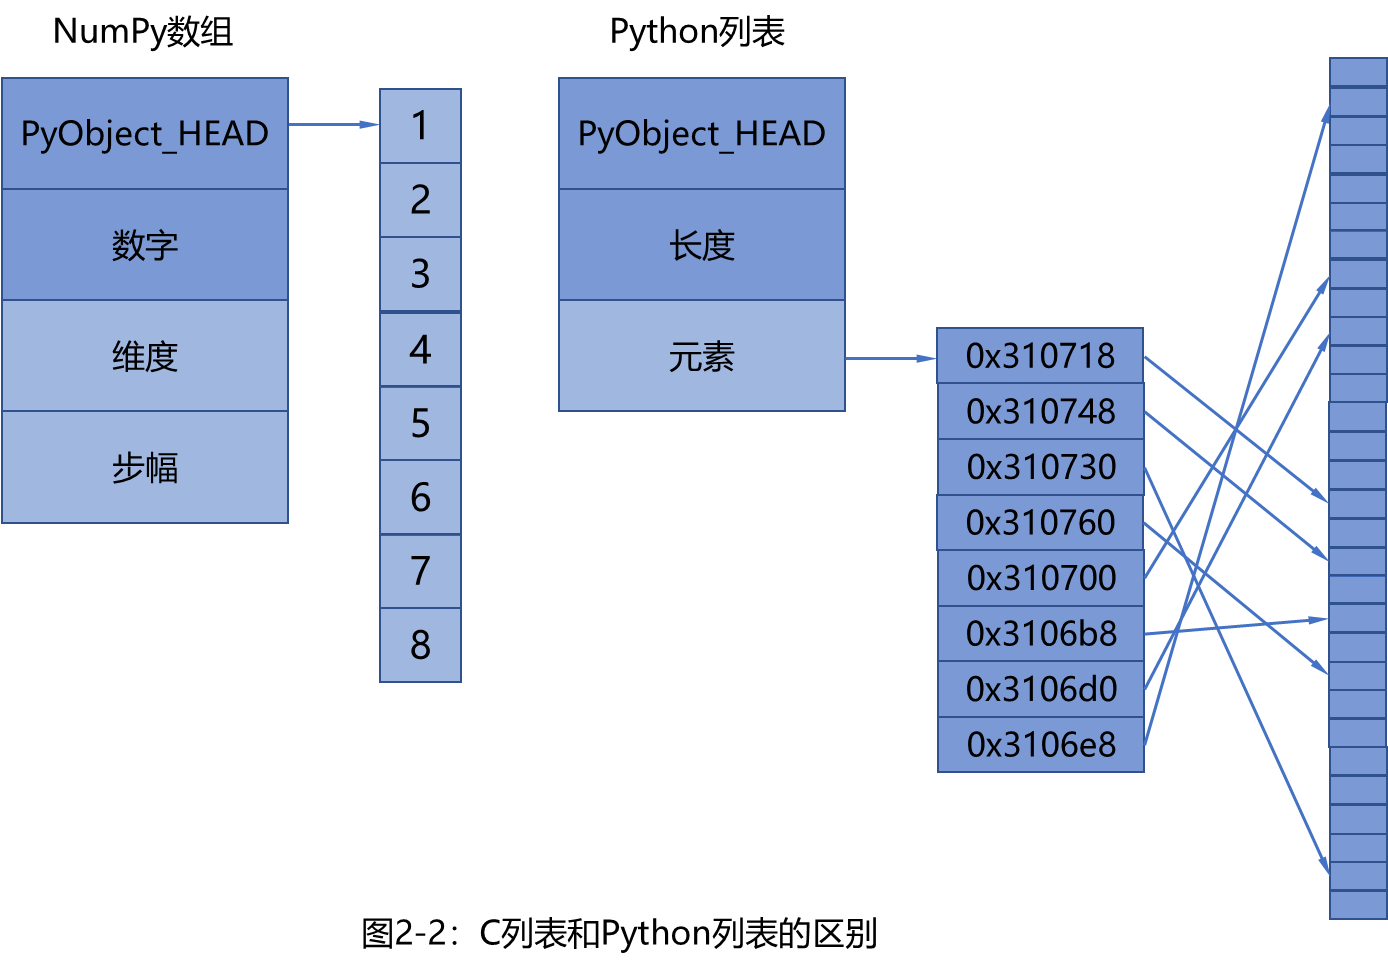

In [13]:
from IPython.display import Image
Image(filename = 'D:/graphs/Python Data Science Handbook/Chapter2/graph2-2.png', width = 900, height = 540)

在实现层面，数组基本上包含一个指向连续数据块的指针。另一方面，Python列表包含一个指向指针块的指针，这其中的每个指针对应于一个完整的Python对象(如前面看到的Python整型)。另外，列表的优势是灵活性，因为每个列表元素是一个包含数据和类型信息的完整结构体，而且列表可以用任意类型的数据填充。固定类型的NumPy式数组缺乏这种灵活性，但是能更有效地存储和操作数据。   

### 2.1.3 Python中固定的类型数组   

Python提供了几种将数据存储在有效的、固定类型的数据缓存中的选项。内置的数组(array)模块(在Python3.3之后可用)可以用于创建统一类型的密集数组：

In [14]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

这里的'i'是一个数据类型码，表示数据为整型。   
更实用的是NumPy包中的ndarray对象。Python的数组对象提供了数组型数据的有效存储，而NumPy为该数据加上了高效的操作。稍后将介绍这些操作，这里先展示几种创建NumPy数组的方法。   
从用np别名导入NumPy的标准做法开始：

In [15]:
import numpy as np

### 2.1.4 从Python列表创建数组    

首先，可以从np.array从Python列表创建数组：

In [16]:
# 整型数组：
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

请记住，不同于Python列表，NumPy要求数组必须包含同一类型的数据，如果类型不匹配，NumPy将会向上转换(如果可行)，这里整型被转换为浮点型：

In [17]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

如果希望明确设置数组的数据类型，可以用dtype关键字：

In [18]:
np.array([1, 2, 3, 4], dtype = 'float32')

array([1., 2., 3., 4.], dtype=float32)

最后，不同于Python列表，NumPy数组可以被指定为多维的。以下是用列表的列表初始化多维数组的一种方法：

In [19]:
# 嵌套列表构成的多维数组
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

内层的列表被当做二维数组的行。   

### 2.1.5 从头创建数组   

面对大型数组的时候，用NumPy内置的方法从头创建数组是一种更高效的方法。以下是几个示例：

In [20]:
# 创建一个长度为10的数组，数组的值都是0
np.zeros(10, dtype = int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# 创建一个3X5的浮点型数组，数组的值都是1
np.ones((3, 5), dtype = float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [22]:
# 创建一个3X5的浮点型数组，数组的值都是3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [23]:
# 创建一个线性序列数组
# 从0开始，到20结束，步长为2
# (它和内置的range()函数类似)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [24]:
# 创建一个5个元素的数组，这5个数均匀地分配到0-1：
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [25]:
# 创建一个3 X 3的、在0-1均匀分布的随机数构成的数组：
np.random.random((3, 3))

array([[0.54585011, 0.79524449, 0.50860504],
       [0.92330511, 0.02478464, 0.81994121],
       [0.24073362, 0.0071255 , 0.47177577]])

In [27]:
# 创建一个3 X 3的、均值为0，标准差为1的正态分布的随机数数组
np.random.normal(0, 1, (3, 3))

array([[ 0.13551949, -0.79022839,  1.11643098],
       [-1.43433504, -0.23739532, -0.85036004],
       [-0.15212669, -1.75951983,  0.32155646]])

In [28]:
# 创建一个3 X 3的、[0, 10]区间的随机整型数组
np.random.randint(0, 10, (3, 3))

array([[2, 8, 3],
       [8, 1, 8],
       [2, 9, 3]])

In [29]:
# 创建一个3 X 3的单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
# 创建一个由3个整型数组成的未初始化的数组
# 数组的值是内存空间中的任意值
np.empty(3)

array([1., 1., 1.])

### 2.1.6 NumPy标准数据类型    

NumPy数组包含同一类型的值，因此详细了解这些数据类型及其限制是非常重要的。因为NumPy是在C语言基础上开发的，所以C、Fortran和其他类似语言的用户会比较熟悉这些数据类型。   
表2-1列出了标注NumPy数据类型。请注意，当构建一个数组时，你可以用一个字符串参数来指定数据类型：

In [31]:
np.zeros(10, dtype = 'int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

或者相关的NumPy对象来指定：

In [32]:
np.zeros(10, dtype = np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

$$
\text{表2-1：NumPy标准数据类型}  \\
\begin{array}{l|l}
\hline
\text{数据类型} \quad & \text{描述}   \\
\hline   
bool_ \quad & \text{布尔值(真、True或假、False)，用一个字节存储}  \\
int_ \quad & \text{默认整型(类似于C语言中的long，通常情况下是int64或int32)}  \\
intc \quad & \text{同C语言的int相同(通常是int32或int64)}  \\
intp \quad & \text{用作索引的整型(和C语言的ssize_t相同，通常情况下是int32或int64)}   \\
int8 \quad & \text{字节(范围从-128到127)}  \\
int16 \quad & \text{整型(范围从-32768到32767)}  \\
int32 \quad & \text{整型(范围从-2147483648到2147483647)}  \\
int64 \quad & \text{整型(范围从-9223372036854775808到9223372036854775807)}  \\
uint8 \quad & \text{无符号整型整型(范围从0到255)}  \\
uint16 \quad & \text{无符号整型整型(范围从0到65535)}  \\
uint32 \quad & \text{无符号整型整型(范围从0到4294967295)}  \\
uint64 \quad & \text{无符号整型整型(范围从0到18446744073709551615)}  \\
float_ \quad & \text{float64的简化形式}  \\
float16 \quad & \text{半精度浮点型：符号比特为，5比特位指数(expoment),10比特位尾数(mantissa)}  \\
float32 \quad & \text{单精度浮点型：符号比特为，8比特位指数(expoment),23比特位尾数(mantissa)}  \\
float64 \quad & \text{双精度浮点型：符号比特为，11比特位指数(expoment),52比特位尾数(mantissa)}  \\
complex_ \quad & \text{complex128的简化形式}   \\
complex64 \quad & \text{复数，由两个32位浮点数表示}   \\
complex128 \quad & \text{复数，由两个64位浮点数表示}  \\
\hline
\end{array}
$$
还可以进行更高级的数据类型指定，例如指定高位字节数或低位字节数；更多的信息可以在NumPy文档(<http://numpy.org/>)中查看。NumPy也支持符合数据类型，这一点会在2.9节中介绍。

## 2.2 NumPy数组基础    

Python中的数据操作几乎等同于NumPy数组操作，甚至新出现的Pandas工具(第3章将介绍)也是构建在NumPy数组的基础之上的。本节将展示一些用NumPy数组操作获取数据或子数组，对数组进行分裂、变形和连接的例子。本节介绍的操作类型可能读起来有些枯燥，但其中也包括了本书其他例子中将用到的内容，所以要好好了解这些内容！   
我们将介绍以下几类基本的数据操作。   
*数组的属性*   
确定数组的大小、形状、存储大小、数据类型。
*数组的索引*   
获取和设置数组各个元素的值。   
*数组的切分*   
在大的数组中获取或设置更小的子数组。   
*数组的变形*   
改变给定数组的形状。   
*数组的拼接和分裂*   
将多个数组合并为一个，以及将一个数组分裂为多个。   

### 2.2.1 NumPy数组的属性    

先介绍一些有用的数组属性。定义三个随机的数组：一个一维数组、一个二维数组和一个三维数组。我们将用NumPy的随机数发生器设置一组种子值，以确保每次程序执行时都可以生成同样的随机数组：

In [36]:
import numpy as np
np.random.seed(0)  # 设置随机数种子  

x1 = np.random.randint(10, size = 6)  # 一维数组
x2 = np.random.randint(10, size = (3, 4))  # 二维数组
x3 = np.random.randint(10, size = (3, 4, 5))  # 三维数组
x1

array([5, 0, 3, 3, 7, 9])

每个数组有ndim(数组的维度)、shape(数组每个维度的大小)和size(数组的总大小)属性：

In [39]:
print('x3 ndim:', x3.ndim)
print('x3 shape:', x3.shape)
print('x3 size:', x3.size)

x3 ndim: 3
x3 shape: (3, 4, 5)
x3 size: 60


另一个有用的属性是dtype，它是数组的数据类型(2.1节讨论过)：

In [40]:
print('dtype:', x3.dtype)

dtype: int32


其他属性包括表示每个数组元素字节大小的itemsize，以及表示数组总字节大小的属性nbytes：

In [41]:
print('itemsize:', x3.itemsize, 'bytes')
print('nbytes:', x3.nbytes, 'bytes')

itemsize: 4 bytes
nbytes: 240 bytes


一般来说，可以认为nbytes跟itemsize和size的乘积大小相等。   

### 2.2.2 数组索引：获取单个元素    

如果你属性Python的标准列表索引，那么你对NumPy的索引方式也不会陌生。和Python列表一样，在一维数组中，你也可以通过中括号指定索引获取第$i$个值(从0开始计数)：

In [42]:
x1

array([5, 0, 3, 3, 7, 9])

In [43]:
x1[0]

5

In [ ]:
x1[4]

为了获取数组的末尾索引，可以用负值索引：   

In [45]:
x1[-1]

9

In [46]:
x1[-2]

7

也可以用以上索引方式修改元素值：

In [48]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

请注意，和Python列表不同，NumPy数组是固定类型的。这意味着当你试图将一个浮点值插入一个整型数组时，浮点值会被截短成整型。并且这种截短是自动完成的，不会给你提示或警告，所以需要特别注意这一点！

In [49]:
x1[0] = 3.14159  # 这将被截短
x1

array([3, 0, 3, 3, 7, 9])

### 数组切片：获取子数组    

整如此前用中括号获取单个数组元素，我们也可以用切片(slice)符号获取子数组，切片符号用冒号(:)表示。NumPy切片语法相同。为了获取数组x的一个切片，可以ongoing如下方式：

如果以上三个参数都未指定，那么他们会被分别设置默认值start = 0、stop = 维度的大小(size of dimension)和step = 1。我们将详细介绍如何在一维和多维数组中获取子数组。   
1. 一维子数组

In [50]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
x[:5]  # 索引前五个元素

array([0, 1, 2, 3, 4])

In [52]:
x[5:]  # 索引五之后的元素

array([5, 6, 7, 8, 9])

In [53]:
x[4:7]  # 中间的子数组

array([4, 5, 6])

In [54]:
x[::2]  # 每隔一个元素

array([0, 2, 4, 6, 8])

In [55]:
x[1::2]   # 每隔一个元素，从索引1开始

array([1, 3, 5, 7, 9])

你可能会在步长为负时感到困惑。在这个例子中，start参数和stop参数默认是被交换的。   
因此这是一种非常方便的逆序数组的方式：

In [56]:
x[::-1]  # 所有元素，逆序的

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [57]:
x[5::-2]  # 从索引5开始每隔一个元素逆序

array([5, 3, 1])

2. 多维子数组   
多维切片也采用同样的方式处理，用逗号分隔。例如：

In [58]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [59]:
x2[:2, :3]  # 两行，三列

array([[12,  5,  2],
       [ 7,  6,  8]])

In [60]:
x2[:3, ::2]  # 所有行，每隔一列

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

最后，子数组维度也可以同时被逆序：

In [61]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

3. 获取数组的行和列   
一种常见的需求是获取数组的单行和单列。你可以将索引与切片组合起来实现这个功能，用一个冒号(:)表示空切片：

In [62]:
print(x2[:, 0])  # x2的第一列

[12  7  1]


In [63]:
print(x2[0, :])   # x2的第一行

[12  5  2  4]


在获取行时，出于语法的简洁考虑，可以省略空的切片：

In [64]:
print(x2[0])   # 等于x2[0, :]

[12  5  2  4]


4. 非副本视图的子数组    
关于数组切片有一点很重要也是非常有用，那就是数组切片返回的是数组数据的视图，而不是数值数据的副本。这一点也是NumPy数组切片和Python列表切片的不同之处：在Python列表中，切片是值的副本。例如此前示例中的那个二维数组：   

In [65]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


从中抽取一个2$\times$2的子数组:

In [66]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


现在如果修改这个子数组，将会看到原始数组也被修改了！结果如下所示：

In [67]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [68]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


这种默认的处理方式实际上非常有用：它意味着在处理非常大的数据集时，课获取或处理这些数据集的片段，而不用复制底层的数据缓存。
5. 创建数组的副本   
尽管数据视图有一些非常好的特性，但是在有些时候明确地复制数组里的数据后子数组也是非常有用的。可以很简单地通过copy()方法实现：

In [70]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


如果修改这个子数组，原始的数组不会被改变：

In [71]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [73]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### 2.2.4 数组的变形    

另一个有用的操作类型是数组的变形。数组变形最灵活的实现方式是通过reshape()函数来实现。例如，如果你希望将数字1-9放入一个3$\times$3的矩阵中，课采用如下方法：   

In [75]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


请注意，如果希望该方法可行，那么原始数组的大小必须和变型后数组的大小一致。如果满足这个条件，reshape方法将会用到原始数组的一个非副本视图。但实际情况是，在非连续的数据缓存的情况下，返回非副本视图往往不可能实现。   
另外一个常见的变形模式是将一个一维数组转变为二维的行或列的矩阵。你也可以通过reshape方法来实现，或者更简单地在一个切片操作中利用newaxis关键字：

In [76]:
x = np.array([1, 2, 3])

# 通过变形获得的行向量
x.reshape((1, 3))

array([[1, 2, 3]])

In [77]:
# 通过newaxis获得的行向量
x[np.newaxis, :]

array([[1, 2, 3]])

In [78]:
# 通过变形获得的列向量
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [79]:
# 通过newaxis获得的列向量
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

在本书的其余部分中，你将看到很多这种变形。   

### 2.2.5 数组拼接和分裂    

以上所有的操作都是针对单一数组的，但有时也需要将多个数组合并为一个，或将一个数组分裂成多个。接下来将详细介绍这些操作。
1. 数组的拼接   
拼接或连接NumPy中的两个数组主要由np.concatenate、np.vstack和np.hstack例程实现。np.concatenate将数组元组或数组列表作为第一个参数，如下所示：

In [80]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

你也可以一次性凭借两个以上数组：

In [81]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


np.concatenate也可以用于二维数组的拼接：

In [82]:
grid = np.array([[1, 2, 3],
                [4, 5, 6]])

In [83]:
# 沿着第一个轴拼接
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [84]:
# 沿着第二个轴拼接(从0开始索引)
np.concatenate([grid, grid], axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

沿着固定维度处理数组时，使用np.vstack(垂直栈)和np.hstack(水平栈)函数会更简洁：

In [86]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# 垂直堆栈数组
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [87]:
# 水平堆栈数组
y = np.array([[99],
              [99]])
np.hstack([grid,y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

与之类似，np.dstack将沿着第三个维度拼接数组。

2. 数组的分裂   
与拼接操作相反的过程是分裂。分裂可以通过np.split、np.hsplit和np.vsplit函数来实现。可以像以上函数传递一个索引列表作为参数，索引列表记录的是分裂点位置：

In [3]:
import numpy as np

x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


值得注意的是，N分裂点会得到N+1个子数组。相关的np.hsplit和np.vsplit的用法也类似：

In [5]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [6]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [7]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


同样，np.dsplit将数组沿着第三个维度分裂。   

## 2.3 NumPy数组的计算：通用函数    

到目前为止，我们讨论了NumPy的一些基础知识。在接下来的几小节中，我们将深入了解NumPy在Python数据科学世界中如此重要的原因。明确点说，NumPy提供了一个简单灵活的接口来优化数组的计算。   
NumPy数组的计算有时非常快，有时非常慢。使NumPy变快的关键是利用向量化操作，通常在NumPy的通用函数(ufunc)中实现。本节将介绍NumPy通用函数的重要性——它可以提高数组元素的重复计算的效率；然后，将会介绍很多NumPy包中常用且有用的数学通用函数。  

### 2.3.1 缓慢的循环    

Python的默认实现(被称作CPython)处理起某些操作时非常慢，一部分原因是该语言的动态性和解释性——数据类型灵活的特性决定了序列操作不能像C语言和Fotran语言一样被编译成有效的机器码。目前，有一些项目视图解决Python这一弱点，比较知名的包括：PyPy项目(<http://pypy.org>)，一个实时的Python编译实现；Cython项目(<http://cython.org>)，将Python代码转换成快速的LLVM字节码。以上这些项目都各有其优势和劣势，但是比较保守地说，这些方法中还没有一种能达到或超过标准CPython引擎的受欢迎程度。   
Python的相对缓慢通常出现在很多小操作需要不断重复的时候，比如对数组的每个元素做循环操作时。假设有一个数组，我们想计算每个元素的倒数，一种直接的解决方法是：

In [8]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size = 5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

这种实现方式可能对于有C语言或Java背景的人来说非常自然，但是如果测试一个很大量的输入数据运行上述代码的时候，这一操作将非常耗时，并且是超出意料的慢！我们将用IPython的%timeit魔法函数(详情参见1.9节)来测量：

In [9]:
big_array = np.random.randint(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

1.97 s ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


完成百万次上述操作并存储结果花了几秒钟的时间！在手机都已Giga-FLOPS(即每秒十亿次浮点运算)为单位计算处理速度时，上面的处理结果所花费的时间确实是不合时宜的慢。事实上，这里的处理瓶颈并不是运算本身，而是CPython在每次循环时必须要做数据类型的检查和函数的调度。每次进行倒数运算时，Python首先检查对象的类型，并且动态查找可以使用该数据类型的正确函数。如果我们在编译代码时进行这样的操作，那么就能在代码执行之前知晓类型的声明，结果的计算也会更加有效率。   

### 2.3.2 通用函数介绍    

NumPy为很多类型的操作提供了非常方便的、静态类型的、可编译程序的接口，也被称为向量操作。你可以通过简单地对数组执行操作来实现，这里对数组的操作将会被用于数组中的每一个元素。这种向量方法被用于将循环推送至NumPy之下的编译层，这样会取得更快的执行效率。   
比较以下连个结果：

In [10]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


如果计算一个较大数组的运行时间，可以看到它的完成时间比Python循环花费的时间更短：

In [12]:
%timeit (1.0 / big_array)

3.1 ms ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy中的向量操作时通过通用函数实现的。通用函数的主要目的是对NumPy数组中的值执行更快的重复操作。它非常灵活，前面我们看过了标量和数组的运算，但是也可以对两个数组进行运算：

In [13]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

通用函数并不仅限于一维数组的运算，它们也可以进行多维数组的运算：

In [14]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

通过通用函数用向量的方式计算几乎总比用Python循环时间的计算更加有效，尤其是当数组很大时。只要你看到Python脚本中有这样的循环，就应该考虑能否用向量方式替换这个循环。

### 2.3.3 探索NumPy的通用函数   

通用函数有两种存在形式：一元通用函数(unary ufunc)对单个输入操作，二元通用函数(binary ufunc)对两个输入操作。我们将在以下的介绍中看到这两种类型的例子。   
1. 数组的运算   
NumPy通用函数的使用方式非常自然，因为他用到了Python元素的算术运算符，标准的加、减、乘、除都可以使用：

In [15]:
x = np.arange(4)
print('x     =', x)
print('x + 5 =', x + 5)
print('x - 5 =', x - 5)
print('x * 2 =', x * 2)
print('x / 2 =', x / 2)
print('x // 2 = ', x // 2)    # 向下整除运算

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 =  [0 0 1 1]


还有求负数、\*\*表示的指数运算符合%表示的模运算符的一元通用函数：

In [17]:
print('-x     =', -x)
print('x ** 2 =', x ** 2)
print('x % 2 =', x % 2)

-x     = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2 = [0 1 0 1]


你可以任意将这些算术运算符组合使用。当然，你得考虑这些运算符的优先级：

In [18]:
- (0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

所有这些算术运算符都是NumPy内置函数的简单封装器，例如+运算就是一个add函数的封装器

In [19]:
np.add(x, 2)

array([2, 3, 4, 5])

表2-2列出了所有NumPy实现的算术运算符。   
$$
\text{表2-2：Numpy实现的算术运算符}  \\
\begin{array}{l|l|l}
\hline
\text{运算符} & \text{对应的通用函数} & \text{描述} \\
\hline
\text{+} & \text{np.add} & \text{加法运算(即 1 + 1 = 2)} \\
\text{-} & \text{np.subtract} & \text{减法运算(即 3 - 2 = 1)} \\
\text{-} & \text{np.negative} & \text{负数运算(即 - 2 )} \\
\text{*} & \text{np.multiply} & \text{乘法运算(即 2 * 3 = 6)} \\
\text{/} & \text{np.divide} & \text{除法运算(即 3 - 2 = 1)} \\
\text{//} & \text{np.floor_divide} & \text{向下整除运算(floor division即 3 // 2 = 1)} \\
\text{**} & \text{np.power} & \text{指数运算(即 2 ** 3 = 8)} \\
\text{%} & \text{np.mod} & \text{模 / 余数(即 9 % 4 = 1)} \\
\hline
\end{array}
$$

另外，NumPy中还有布尔/位运算符，这些运算符将在2.6节中国进一步介绍。
2. 绝对值   
正如NumPy能理解Python内置的预算操作，NumPy也可以理解Python内置的绝对值函数：

In [20]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

对应的NumPy通用函数是np.absolute，该函数也可以用别名np.abs来访问：

In [21]:
np.absolute(x)
np.abs(x)

array([2, 1, 0, 1, 2])

这个通用函数也可以处理复数。当处理复数时，绝对值返回的是该复数的模(magnitude):

In [22]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 +1j])
np.abs(x)

array([5., 5., 2., 1.])

3. 三角函数   
NumPy提供了大量好用的通用函数，其中对于数据科学家有用的就是三角函数。首先定义一个角度数组：

In [23]:
theta = np.linspace(0, np.pi, 3)

现在可以对这些值进行一些三角函数计算：

In [24]:
print('theta      =', theta)
print('sin(theta) =', np.sin(theta))
print('cos(theta) =', np.cos(theta))
print('tan(theta) =', np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


这些值是在及其精度内计算的，所以有些应该是0的值并没有精确到0。逆三角函数同样可以使用：

In [25]:
x = [-1, 0, 1]
print('x         =', x)
print('arcsin(x) =', np.arcsin(x))
print('arccos(x) =', np.arccos(x))
print('arctan(x) =', np.arctan(x))

x         = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


4. 指数和对数   
NumPy中另一个常用的运算通用函数是指数运算：

In [26]:
x = [1, 2, 3]
print('x    =', x)
print('e^x  =', np.exp(x))
print('2^x  =', np.exp2(x))
print('3^x  =', np.power(3, x))

x    = [1, 2, 3]
e^x  = [ 2.71828183  7.3890561  20.08553692]
2^x  = [2. 4. 8.]
3^x  = [ 3  9 27]


指数运算的逆运算，即对数运算也是可用的。最基本的np.log给出的是以自然常数(e)为底数的对数。如果你希望计算以2位底数或者以10位底数的对数，可以按照如下示例处理：

In [28]:
x = [1, 2, 4, 10]
print('x        =', x)
print('ln(x)    =', np.log(x))
print('log2(x)  =', np.log2(x))
print('log10(x) =', np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


还有一些特殊的版本，对于非常小的输入值可以保持较好的精度：

In [27]:
x = [0, 0.001, 0.01, 0.1]
print('exp(x) - 1 = ', np.expm1(x))
print('log(1 + x) = ', np.log1p(x))

exp(x) - 1 =  [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) =  [0.         0.0009995  0.00995033 0.09531018]


当x的值很小时，以上函数给出的值比np.log和np.exp的计算更精确。
5. 专用的通用函数   
除了以上介绍的NumPy还提供了很多通用函数，包括双曲三角函数、比特位运算、比较运算符、弧度化为角度的运算、取整和求余运算，等等。浏览NumPy的文档将会揭示很多有趣的功能。   
还有一个更加专用，也更加晦涩的通用函数优异来源是子模块scipy.special。如果你希望对你的数据进行一些更晦涩的数学计算，scipy.special可能包含了你需要的计算函数。这些函数能列一个长长的列表，下面的代码片段展示了一些可能在统计学中用到的函数：

In [29]:
from scipy import special

In [32]:
## Gamma函数(广义阶乘，generalized factorials)和相关函数
x = [1, 5, 10]
print('gamma(x)     =', special.gamma(x))
print('ln|gamma(x)  =', special.gammaln(x))
print('beta(x, 2)   =', special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)  = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [33]:
# 误差函数(高斯积分)的实现和逆实现
x = np.array([0, 0.3, 0.7, 1.0])
print('erf(x)    =', special.erf(x))
print('erfc(x)   =', special.erfc(x))
print('erfinv(x) =', special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


NmpPy和scipy.special中提供了大量的通用函数，这些包的文档在网上就可以查到，搜索"gamma function python"即可。   

### 2.3.4 高级的通用函数特性   

很多NumPy用户在没有完全了解通用函数的特性时就开始使用它们，这里将介绍一些通用函数的特殊性质。
1. 指定输出   
在进行大量运算时，有时候指定一个用于存放运算结果的数组是非常有用的。不同于创建临时数组，你可以用这个特性将计算结果直接写入到你期望的存储位置。所有的通用函数都可以通过out参数来指定计算结果的存放位置：

In [34]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


这个特性也可以被用作数组视图，例如可以将计算结果写入指定数组的每隔一个元素的位置：

In [36]:
y = np.zeros(10)
np.power(2, x, out = y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


如果这里写的是y\[::2\] = 2 \*\* x,那么结果将是创建一个临时数组，该数组存放的是2 \*\* x的结果，并且接下来会将这些值复制到y数组中。对于上述例子中比较小的计算量来说，这两种方式的差别并不大。但是对于较大的数组，通过慎重使用out参数将能够有效节约内存。
2. 聚合   
二元通用函数有些非常有趣的聚合功能，这些聚合函数可以直接在对象上计算。例如，如果我们希望用一个特定的运算reduce一个数组，那么可以用任何通用函数的reduce方法。一个reduce方法会对给定搞得元素和操作重复执行，直至得到单个的结果。   
例如，对add通用函数调用reduce方法会返回数组中所有元素的和：

In [37]:
x = np.arange(1, 6)
np.add.reduce(x)

15

同样，对multiply通用函数调用reduce方法会返回数组中所有元素的乘积：

In [2]:
import numpy as np
x = np.arange(1, 6)

In [4]:
np.multiply.reduce(x)

120

如果需要存储每次计算的中间结果，可以使用accumulate：

In [5]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [6]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

请注意，在一些特殊情况中，NumPy提供了专用的函数(np.sum、np.prod、np.cumsum、np.cumprod)，它们也可以实现以上reduce功能，这些函数将在2.4节中具体介绍。
3. 外积   
最后，任何通用函数都可以用outer方法获得两个不同输入数组所有元素对的函数运算结果。这意味着你可以用一行代码实现一个乘法表：

In [7]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

2.7节将介绍非常有用的ufunc.at和ufunc.reduceat方法。   
通用函数另外一个非常有用的特性时它能操作不同大小和形状的数组，一组这样的操作被称为(broadcasting)。这个主题非常重要，我们将用一整节的内容介绍它(参见2.5节)。   

### 2.3.5 通用函数：更多的信息    

有关通用函数的更多信息(包括可用的通用函数的完整列表)可以在NumPy(<http://www.numpy.org>)和SciPy(<http://www.scipy.org>)文档的网站找到。   
前面的章节介绍过，课直接在IPython中通过导入相应的包，然后利用IPython的Tab键补全和帮助(?)功能获取信息，详情请参见1.2节。   

## 2.4 聚合：最小值、最大值和其他值    

当你面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计值。最常用的概括统计值可能是均值和标准差，这两个值能让你分别概括出数据集中的"经典"值，但是其他一些形式的聚合也是非常有用的(如求和、乘积、中位数、最小值和最大值、分位数，等等)。NumPy有非常快速的内置聚合函数可用于数组，我们将介绍其中的一些。   

### 2.4.1 数组值求和    

先来看一个小例子，设想计算一个数组中所有元素的和。Python本身可用内置的sum函数来实现：

In [8]:
L = np.random.random(100)
sum(L)

51.20027482548602

它的语法和NumPy的sum函数非常相似，并且在这个简单的例子中的结果也是一样的：

In [9]:
np.sum(L)

51.20027482548602

但是，因为NumPy的sum函数在编译码中执行操作，所以NumPy的操作计算得更快一些：

In [11]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

136 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.31 ms ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


但是需要注意，sum函数和np.sum函数并不等同，这有时会导致混淆。尤其是它们各自的可选参数都有不同的含义，np.sum函数是知道数组的维度的，这一点将在接下来的部分讲解。   

### 2.4.2 最小值和最大值    

同样，Python也有内置的min函数和max函数，分别被用于获取给定数组的最小值和最大值：

In [13]:
min(big_array), max(big_array)

(1.4996932873323487e-06, 0.9999981526200251)

NumPy对应的函数也有类似的语法，并且执行得更快：

In [14]:
np.min(big_array), np.max(big_array)

(1.4996932873323487e-06, 0.9999981526200251)

In [17]:
%timeit min(big_array)
%timeit np.min(big_array)

88 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
414 µs ± 4.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


对于min、max、sum和其他NumPy聚合，一种更简洁的语法形式是数组对象直接调用这些方法：

In [19]:
print(big_array.min(), big_array.max(), big_array.sum())

1.4996932873323487e-06 0.9999981526200251 499749.65784068214


当你操作NumPy数组时，确保你执行得是NumPy版本的聚合。
1. 多维度聚合   
一种常见的聚合操作时沿着一行或一列聚合。例如，假设你有一些数据存储在二维数组中：

In [20]:
M = np.random.random((3, 4))
print(M)

[[0.32779063 0.64382676 0.62294872 0.99688927]
 [0.39368946 0.68794328 0.54101291 0.32593359]
 [0.46589841 0.36007597 0.90945365 0.42037233]]


默认情况下，每一个NumPy聚合函数将会返回对整个数组的聚合结果：

In [21]:
M.sum()

6.695834965484189

聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合。例如，可以通过指定axis = 0找的每一列的最小值：

In [22]:
M.min(axis = 0)

array([0.32779063, 0.36007597, 0.54101291, 0.32593359])

这个函数返回四个值，对应四列数字的计算值。   
同样，也可以找到每一行的最大值：

In [23]:
M.max(axis = 1)

array([0.99688927, 0.68794328, 0.90945365])

其他语言的用户对轴的指定方式比较困惑。axis关键字指定的是数组将会被折叠的维度，而不是将要返回的维度。因此指定axis = 0意味着第一个轴将要被折叠——对于二维数组，这意味着每一列的值将被聚合。   
2. 其他聚合函数   
NumPy提供了很多其他聚合函数，但是这里不会详细地介绍它们。另外，大多数的聚合都有对NaN值得安全处理策略(NaN-safe)，即计算时忽略所有的缺失值。这些缺失值即特殊的IEEE浮点型NaN值(关于缺失值更全面的介绍参见3.5节)。有些NaN-safe的函数直到NumPy1.8版本才加进去，所以更早版本的NumPy并不支持此功能。   
表2-3提供了一个NumPy中可用的聚合函数的清单。   
$$
\text{表2-3：NumPy中可用的聚合函数}  \\
\begin{array}{l|l|}
\hline
\text{函数名称} & \text{NaN安全版本} & \text{描述}  \\
\hline
\text{np.sum} & \text{np.nansum} & \text{计算元素的和}  \\
\text{np.prod} & \text{np.nanprod} & \text{计算元素的积}  \\
\text{np.mean} & \text{np.nanmean} & \text{计算元素的平均值}  \\
\text{np.std} & \text{np.nanstd} & \text{计算元素的标准差}  \\
\text{np.var} & \text{np.nanvar} & \text{计算元素的方差}  \\
\text{np.min} & \text{np.nanmin} & \text{找出最小值}  \\
\text{np.max} & \text{np.nanmax} & \text{找出最大值}  \\
\text{np.argmin} & \text{np.nanargmin} & \text{找出最小值的索引}  \\
\text{np.argmax} & \text{np.nanargmax} & \text{找出最大值的索引}  \\
\text{np.median} & \text{np.nanmedian} & \text{计算元素的中位数}  \\
\text{np.percentile} & \text{np.nanpercentile} & \text{计算基于元素排序的统计值}  \\
\text{np.any} & \text{N/A} & \text{验证是否存在元素为真}  \\
\text{np.all} & \text{N/A} & \text{验证是否所有元素为真}  \\
\hline
\end{array}
$$

本书的其余部分将展示这些聚合函数的使用方法。   

### 2.4.3 示例：美国总统的身高是多少    

用NumPy的聚合功能来概括一组数据非常有用。这里举一个简单的例子——计算所有美国总统的身高。这个数据在president_heights.csv文件中，是一个简单的用逗号分隔的标签的值得列表：

In [28]:
!head -4 data/president_heights.csv

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


我们将用pandas包来读文件并抽取身高信息。(请注意，身高的计量单位是厘米。)第3章将更全面介绍Pandas：

In [31]:
import pandas as pd
data = pd.read_csv('D:\Python\Python Project\Python_Data_Science_Handbook-master\data\president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


有了这个数据数组后，就可以计算很多概括统计值了：

In [32]:
print('Mean height:       ', heights.mean())
print('Standard deviation:', heights.std())
print('Minimum height:    ', heights.min())
print('Maximum height:    ', heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


请注意，在这个例子中，聚合操作将整个数组缩减到单个概括值，这个概括值给出了这些数值的分布信息。我们也可以计算分位数：

In [33]:
print('25th percent:   ', np.percentile(heights, 25))
print('Median:         ', np.median(heights))
print('75th perentile: ', np.percentile(heights, 75))

25th percent:    174.25
Median:          182.0
75th perentile:  183.0


可以看到，美国总统的身高中位数是182cm，或者说不到6英尺。   
当然，有些时候将数据可视化更有用。这时可以下进行一个快速的可视化，通过Matplotlib(第4章将详细讨论该工具)用一下代码创建图2-3：

Text(0, 0.5, '人数')

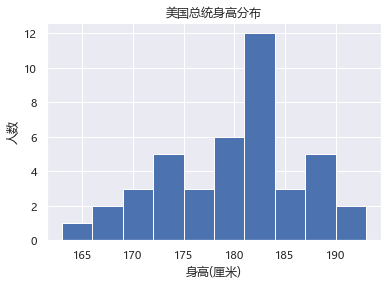

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()   # 设置绘图风格

plt.rcParams['font.sans-serif'] = ['MicroSoft YaHei']   # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像时负号"-"显示为方块的问题

plt.hist(heights)
plt.title('美国总统身高分布')
plt.xlabel('身高(厘米)')
plt.ylabel('人数')

$$\text{图2-3：总统身高的直方图}$$

这些聚合是探索数据分析的一些最基本片段，本书后续的章节将进行更深入的介绍。   

## 2.5 数组的计算：广播的介绍    

前面提到，对于同样大小的数组，二元运算符是对相应元素逐个计算：

In [38]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

广播允许这些二元运算符可以用于不同大小的数组，例如，可以简单地将一个标量(可以认为是一个零维的数组)和一个数组相加：

In [40]:
a + 5

array([5, 6, 7])

我们可以认为这个操作是将数值5扩展或重复至数组\[5, 5, 5\]，然后执行加法。NumPy广播功能的好处是，这种对值的重复实际上并没有发生，这是一种很好用的理解广播的模型。   
我们同样也可以将这个原理扩展到更高维度的数组，观察一下将一个一维数组和一个二维数组相加的结果：

In [41]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [42]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

这里这个一维数组就被扩展或者广播了。它沿着第二个维度扩展，扩展到匹配M数组的形状。   
以上的这些例子理解起来都相对容易，更复杂的情况会涉及对两个数组的同时广播，例如以下示例：

In [43]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [44]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

正如此前将一个值扩展或广播以匹配另外一个数组的形状，这里将a和b都进行了扩展来匹配一个公共的形状，最终的结果是一个二维数组。以上这些例子的几何可视化如图2-4所示。   
**注** 这幅图像的源码可以在GitHub在线附录中找到，对astroML文档(<http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html>)的源代码进行了调整，已获得使用许可。

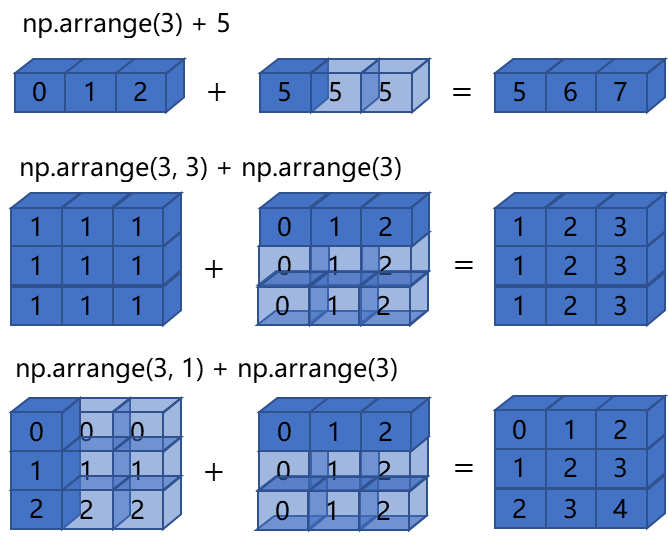

In [52]:
from IPython.display import Image
Image(filename = 'D:/graphs/Python Data Science Handbook/Chapter2/graph2-4.png', width = 450, height = 270)

$$\text{图2-4：NumPy广播的可视化}$$

浅色的盒子表示广播的值。同样需要注意的是，这个额外的内存并没有在实际操作中国进行分配，但是这样的想象方式更方便我们从概念上理解。   

### 2.5.2 广播的规则    

NumPy的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作。   
* 规则1：如果两个数组的维度数不相同，那么小维度数组的形式将会在最左边补1。
* 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的形状。
* 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常。   

为了更清楚地理解这些规则，来看几个具体示例：   

1. 广播示例1   
将一个二维数组与一个一维数组相加：

In [54]:
M = np.ones((2, 3))
a = np.arange(3)

来看这两个数组的加法操作。两个数组的形状如下：

可以看到，根据规则1，数组a的维度数更小，所以在其左边补1：

根据规则2，第一个维度补匹配，因此扩展这个维度以匹配数组：

现在两个数组的形状匹配了，可以看到它们的最终形状都为(2, 3):

In [56]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

2. 广播示例2   
来看两个数组均需要广播的示例：

In [57]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

首先，写出这两个数组的形状：

规则1告诉我们，需要用1把b的形状补全：

规则2告诉我们，需要更新这两个数组的维度来相互匹配：

因为结果匹配，所以这两个形状是兼容的，可以看到以下结果：

In [58]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

3. 广播示例3   
现在来看一个两个数组不兼容的示例：

In [59]:
M = np.ones((3, 2))
a = np.arange(3)

和第一个示例相比，这里有个微小的不同之处：矩阵M是转置的。那么这将如何影响计算呢？两个数组形状如下：

同样，规则1告诉我们，a数组的形状必须用1进行补全：

根据规则2，a数组的第一个维度进行扩展以匹配M的维度：

现在需要用到规则3——最终的形状还是不匹配，因此这两个数组是不兼容的。当我们执行运算时会看到以下结果：

In [60]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

请注意，这里可能发生的混淆在于：你可能想通过在a数组的右边补1，而不是左边补1，让a和M的维度变得兼容。但是这不被广播的规则所允许。这种灵活性在有些场景中可能会有用，但是它可能会导致结果模糊。如果你希望实现右边补全。可以通过变形数组来实现(将会用到np.newaxis关键字，参见2.2节)：

In [61]:
a[:, np.newaxis].shape

(3, 1)

In [62]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

另外也需要注意，这里仅用到了+运算符，而这些广播规则对于任意二进制通用函数都是适用的。例如这里的logaddexp(a, b)函数，比起简单的方法，该函数计算log(exp(a) + exp(b))更准确：

In [63]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

关于可用的通用函数的更多信息，请参见2.3节。   

### 2.5.3 广播的实际应用    

广播操作时本书中很多例子的核心，我们将通过几个简单的示例来展示广播功能的作用。
1. 数组的归一化   
在前面的一节中，我们看到通用函数让NumPy用户免于写得很慢的Python循环。广播进一步扩展了这个功能，一个常见的例子就是数组数据的归一化。假设你有一个有10个观察值的数组，每个观察值包含3个数值。按照惯例(参见5.2节)，我们将用一个10$\times$3的数组存放该数据：

In [64]:
X = np.random.random((10, 3))

我们可以计算每个特征的均值，计算方法是利用mean函数沿着第一个维度聚合：

In [65]:
Xmean = X.mean(0)
Xmean

array([0.5491198 , 0.55477029, 0.67007469])

现在通过从X数组的元素中减去这个均值实现归一化(该操作是一个广播操作)：

In [66]:
X_centered = X - Xmean

为了进一步核对我们的处理是否正确，可以查看归一化的数组的均值是否接近0：

In [67]:
X_centered.mean(0)

array([ 3.33066907e-17, -4.44089210e-17, -6.66133815e-17])

在及其精度范围内，该均值为0。
2. 画一个二维函数   
广播另外一个非常有用的地方在于，它能基于二维函数显示图像。我们希望定义一个函数$z = f(x, y)$，可以用广播沿着数值区间计算该函数：

In [7]:
import numpy as np

# x和y表示0-5区间50个步长的序列
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

我们将用Matplotlib来画出这个二维数组(这些工具将在4.6节中详细介绍)：

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Latex

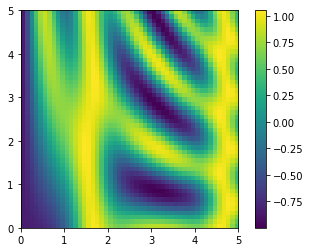

In [9]:
plt.imshow(z, origin = 'lower', extent = [0, 5, 0, 5],
          cmap = 'viridis')
plt.colorbar();

$$\text{图2-5 一个二维数值的可视化}$$
结果如图2-5所示，这是一个引人注目的二维函数可视化。

## 2.6 比较、掩码和布尔逻辑    

这一节将会介绍如何用布尔掩码来查看和操作NumPy数组中的值。当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。例如你可能希望统计数组中有多少值大于某个给定值，或者删除所有超出某些门限值得异常点。在NumPy中，布尔掩码通常是完成这类任务的最高效方式。   

### 2.6.1 示例：统计下雨天数    

假设你有一系列表示某一年内日降水量的数据，这里将用Pandas(将在第3章详细介绍)加载2014年西雅图的日降水统计数据：

In [4]:
import numpy as np
import pandas as pd

# 利用Pandas 抽取降雨量，放入一个Numpy数组
rainfall = pd.read_csv("D:\Python\Python Project\Python_Data_Science_Handbook-master\data\Seattle2014.csv")['PRCP'].values
inches = rainfall / 254   # 1 / 10mm -> inches
inches.shape

(365,)

这个数组包含365个值，给出了从2014年1月1日至2014年12月31日每天的降水量。这里降水量的单位是英寸。   
首先做一个快速的可视化，用Matplotlib(将在第4章详细讨论该工具)生成下雨天数的直方图，如图2-6所示：

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

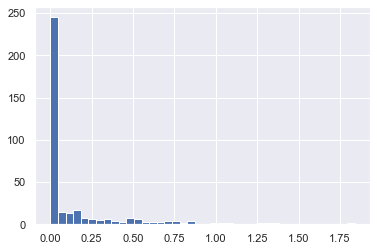

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # 设置绘图风格

plt.hist(inches, 40)

$$\text{图2-6：2014年西雅图降水量直方图}$$

该直方图表明了这些数据的大意：尽管人们对西雅图市有刻板印象，但是2014年它大多数时间的降水量都是接近0的。但是这样做并没有很好地传递出我们希望看到的某些信息，例如一年中有多少天在下雨，这些下雨天的平均降水量是多少，有多少天的降水量超过了半英寸？   
**深入数据**   
回答以上问题的一种方法是通过传统的统计方式，即对所有数据循环，当碰到数据落在我们希望的区间时计数器便加1.这种方法在本章节中多次讨论过，但无论从编写代码的角度看，还是从计算结果的角度看，这都是一种浪费时间、非常低效的方法，我们从2.3节中了解到，NumPy的通用函数可以用来替代循环，以快速实现数组的逐元素(elementwise)运算。同样，我们也可以用其他通用函数实现数组的逐元素比较，然后利用计算结果回答之前提出的问题。先将数据放在一边，来介绍一下NumPy中有哪些用掩码来快速回答这类问题的通用工具。   

### 2.6.2 和通用函数类似的比较操作    

2.3节介绍了通用函数，并且特别关注了算术运算符。我们看到用`+、-、*、/`和其他一些运算符实现了数组的逐元素操作。NumPy还实现了如\<(小于)和>(大于)的逐元素比较的通用函数。这些比较运算的结果是一个布尔数据类型的数组。一共有6中标准的比较操作：

In [12]:
x = np.array([1, 2, 3, 4, 5])

In [13]:
x < 3   # 小于

array([ True,  True, False, False, False])

In [14]:
x > 3

array([False, False, False,  True,  True])

In [15]:
x <= 3

array([ True,  True,  True, False, False])

In [16]:
x >= 3

array([False, False,  True,  True,  True])

In [17]:
x != 3

array([ True,  True, False,  True,  True])

In [18]:
x == 3

array([False, False,  True, False, False])

另外，利用复合表达式实现对两个数组的逐元素比较也是可行的：

In [19]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

和算术运算符一样，比较运算符操作在NumPy中也是借助通用函数来实现的。例如当你写x < 3时，NumPy内部会使用np.less(x, 3)。这些比较运算符和其对应的通用函数如下表所示。   
$$
\begin{array}{l|l}
\hline
\text{运算符} & \text{对应的通用函数}   \\
\hline
\text{==} & \text{np.equal}   \\
\text{!=} & \text{np.not_equal}   \\
\text{<} & \text{np.less}   \\
\text{<=} & \text{np.less_equal}   \\
\text{>} & \text{np.greaterl}   \\
\text{>=} & \text{np.greater_equal}   \\
\hline
\end{array}
$$
和算术运算通用函数一样，这些比较运算通用函数也可以用于任意形状、大小的数组。下面是一个二维数组的示例：

In [20]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [21]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

这样每次计算的结果都是布尔数组了。NumPy提供了一些简明的模式来操作这些布尔结果。   

### 2.6.3 操作布尔数组    

给定一个布尔数组，你可以实现很多有用的操作。首先打印此前生成的二维数组x：

In [22]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


1. 统计记录的个数   
如果需要统计布尔数组中True记录的个数，可以使用np.count_nonzero函数：

In [23]:
# 有多少值小于6？
np.count_nonzero(x < 6)

8

我们看到有8个数组记录是小于6的。另外一种实现方式是利用np.sum。在这个例子中，False会被解释成0，True会被解释成1：

In [24]:
np.sum(x < 6)

8

sum()的好处是，和其他NumPy聚合函数一样，这个求和也可以沿着行或列进行：

In [25]:
# 每行有多少值小于6？
np.sum(x < 6, axis = 1)

array([4, 2, 2])

这是矩阵中每一行小于6的个数。   
如果要快速检查任意或者所有这些值是否为True，可以用np.any()或np.all:

In [26]:
# 有没有值大于8？
np.any(x > 8)

True

In [27]:
# 有没有值小于0？
np.any(x < 0)

False

In [28]:
# 是否所有值都小于10？
np.all(x < 10)

True

In [29]:
# 是否所有值都等于6
np.all(x == 6)

False

np.all()和np.any()也可以用于沿着特定的坐标轴，例如：

In [30]:
# 是否每行的所有值都小于8？
np.all(x < 8, axis = 1)

array([ True, False,  True])

这里第1行和第3行的所有元素都小于8，而第2行不是所有元素都小于8。   
最后需要提醒的是，正如2.4节中提到的，Python有内置的sum()、any()和all()函数，这些函数在NumPy中有不同的语法版本。如果在多维数组上混用这两个版本，会导致失败或产生不可预知的错误结果。因此，确保在以上的示例中用的都是np.sum()、np.any()和np.all()函数。   
2. 布尔运算符   
我们已经看到该如何统计所有降水量小于4英寸或者大于2英寸的天数，但是如果我们想统计降水量小于4英寸且大于2英寸的天数该如何操作呢？这可以通过Python的逐位逻辑运算符(bitwise logic operator)`&、|、^`和`~`来实现。同标注的算术运算符一样，NumPy用通用函数重载了这些逻辑运算符，这样可以实现数组的逐位运算(通常是布尔运算)。   
例如，可写如下的复合表达式：

In [6]:
np.sum((inches > 0.5) & (inches < 1))

29

可以看到，降水量在0.5英寸~1英寸之间的天数是29天。   
请注意，这些括号是非常重要的，因为有运算优先级规则。如果去掉这些括号，该表达式会变成以下形式，这会导致运行错误：

利用A AND B和NOT(NOT A OR NOT B)的等价原理(你应该在基础逻辑课程中学习过)，可以用另外一种形式实现同样的结果：

In [7]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

将比较运算符和布尔运算符并起来用在数组上，可以实现更多有效的逻辑运算操作。以下表格总结了逐位的布尔运算符和其对应的通用函数。   
$$
\begin{array}{l|l}
\hline
\text{运算符} & \text{对应的通用函数}  \\
\hline
\text{&} & \text{np.bitwise_and}  \\
\text{|} & \text{np.bitwise_or}  \\
\text{^} & \text{np.bitwise_xor}  \\
\text{~} & \text{np.bitwise_not}  \\
\hline
\end{array}
$$
利用这些工具，就可以回到那些关于天气数据的问题了。以下的示例是结合使用掩码和聚合实现的结果计算：

In [8]:
print('Number days without rain:       ', np.sum(inches == 0))
print('Number days with rain:          ', np.sum(inches != 0))
print('Days with more than 0.5 inches: ', np.sum(inches > 0.5))
print('Rainy days with < 0.2 inches  : ', np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches  :  75


### 2.6.4 将布尔数组作为掩码   

在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据集。以前面小节用过的x数组为例，假设我们希望抽取出数组中所有小于5的元素：

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

如前面介绍过的方法，利用比较运算符可以得到一个布尔数组：

In [13]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

现在为了将这些值从数组中选出，可以进行简单的索引，即掩码操作：

In [15]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

现在返回的是一个一维数组，它包含了所有满足条件的值。换句话说，所有的这些值是掩码数组对应位置为True的值。   
现在，可以对这些值做任意操作，例如可以根据西雅图降水数据进行一些相关统计：

In [18]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码(6月21日时地172天)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print('Median precip on rainy days in 2014 (inches):    ',
     np.median(inches[rainy]))
print('Median precip on summer days in 2014 (inches):   ',
     np.median(inches[summer]))
print('Maximum precip on summer days in 2014 (inches):  ',
     np.max(inches[summer]))
print('Median precip on non-summer rainy days (inches): ',
     np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


**使用关键字and/or与使用逻辑操作运算符&/|**   
人们经常困惑于关键字and和or，以及逻辑操作运算符&和|的区别是什么，什么时候该选择哪一种？   
它们的区别是：and和or判断整个对象是真是假，而&和|是指每个对象中的比特位。   
当你使用and或or时，就等于让Python将这个对象当做整个布尔实体。在Python中，所有非零的整数都会被当作是True：

In [19]:
bool(42), bool(0)

(True, False)

In [20]:
bool(42 and 0)

False

当你对整数使用&和|时，表达式操作的是元素的比特，将and或or应用于组成该数字的每个比特：

In [21]:
bin(42)

'0b101010'

In [22]:
bin(59)

'0b111011'

In [23]:
bin(42 & 59)

'0b101010'

In [24]:
bin(42 | 59)

'0b111011'

请注意，&和|运算时，对应的二进制比特位进行比较以得到最终结果。   
当你在NumPy中有一个布尔数组时，该数组可以被当作是有比特字符组成的，其中1 = True、0 = False。这样的数组可以用上面介绍的方式进行&和|的操作：

In [25]:
A = np.array([1, 0, 1, 0, 1, 0], dtype = bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype = bool)
A | B

array([ True,  True,  True, False,  True,  True])

而用or来计算这两个数组时，Python会计算整个数组对象的真或假，这会导致程序出错：

In [26]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

同样，对给定数组进行逻辑运算时，你也应该使用|或&，而不是or或and：

如果试图计算整个数组的真或假，程序也同样会给出ValueError的错误：

In [29]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

因此可以记住，and或or对整个对象执行单个布尔运算，而&和|对一个对象的内容(单个比特或字节)执行多个布尔运算。对于NumPy布尔数组，后者是常用的操作。


## 2.7 花式索引   

在前面的小节中，我们看到了如何利用简单的索引值(如arr[0])、切片(如arr[:5])和布尔掩码(如arr[arr > 0])获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也叫花式索引(fancy indexing)。花式索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花式索引让我们能够快速获得并修改复杂的数组值的子数据集。   

### 2.7.1 探索花式索引   

花式索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。例如以下数组：

In [30]:
import numpy as np
rand = np.random.RandomState(42)

x =  rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


假设我们希望获得三个不同的元素，可以用以下方式实现：

In [31]:
[x[3], x[7], x[2]]

[71, 86, 14]

另外一种方法是通过传递索引的单个列表或数组来获取相同的结果：  

In [32]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

利用花式索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

In [33]:
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

花式索引页对多个维度适用，假设我们有以下数组：

In [34]:
X = np.arange(12).reshape(3, 4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：

In [35]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

这里需要注意，结果的第一个值是X[0, 2]，第二个值是X[1, 1]，第三个值是X[2, 3]。在花式索引中 ，索引值的配对遵循2.5节介绍过的广播的规则。因此当我们将一个列向量和一个行向量组合在索引中时，会得到一个二维的结果：

In [36]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算：

In [37]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

这里特别需要记住的是，花式索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状。

### 2.7.2 组合索引    

花式索引可以和其他索引方案结合起来形成强大的索引操作：  

In [38]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


可以将花式的索引和简单的索引组合使用：

In [39]:
X[2, [2, 0, 1]]

array([10,  8,  9])

也可以将花式索引和切片组合使用：

In [40]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

更可以将花式的索引和掩码组合使用：

In [41]:
mask = np.array([1, 0, 1, 0], dtype = bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

索引选项的组合可以实现非常灵活的获取和修改数组元素的操作。   

### 2.7.3 示例：选择随机点   

花式索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个$N\times D$的矩阵，表示在 $D$个维度的$N$个点。以下是一个二维正态分布的点组成的数组：   

In [42]:
import numpy as np
rand = np.random.RandomState(42)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

利用将在第4章介绍的画图工具，可以用散点图将这些点可视化(如图2-7所示)： 

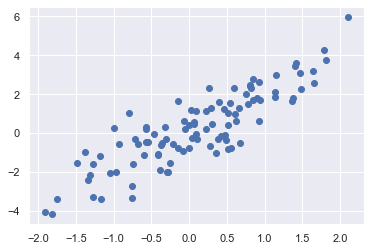

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   #设置绘图风格

plt.scatter(X[:, 0], X[:, 1])

$$\text{图2-7：正态分布的点}$$

我们将利用花式索引随机选取20个点——选择20个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值：   
更可以将花式的索引和掩码组合使用：

In [44]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([86, 94, 28,  6, 52, 21, 45, 78, 80, 16, 38,  9, 63, 84, 10, 17, 32,
       15, 54, 77])

In [45]:
selection = X[indices]
selection.shape

(20, 2)

现在来看哪些点被选中了，将选中的点在图上用圆圈标示出来(如图2-8所示)：

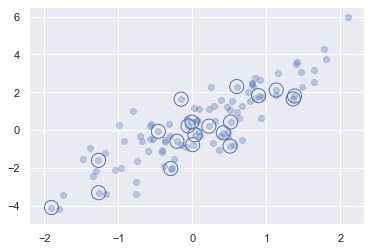

In [46]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor = 'none', edgecolor = 'b', s = 200)

$$\text{图2-8：随机选择的点}$$

这种方法通常用于快速分割数据，即需要分割训练/测试数据集以验证统计模型时，以及在极大统计问题时的抽样方法中使用。

### 2.7.4 用花式索引修改值    

正如花式索引可以被用于获取部分数组，它也可以被用于修改部分数组。例如，假设我们有一个索引数组，并且希望设置数组中对应的值：   

In [47]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


可以用任何的赋值操作来实现，例如：   

In [48]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


不过需要注意，操作中重复的索引会导致一些出乎意料的结果产生，如以下例子所示： 

In [49]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4去哪里了呢？这个操作首先赋值x[0] = 4，然后赋值x[0] = 6，因此当然x[0]的值为6,。以上还算合 理，但是设想以下操作：   

In [50]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

你可能期望x[3]的值为2，x[4]的值为3，因为这是这些索引值重复的次数。但是为什么结果不同于我们的预期呢？从概念的角度理解，这是因为x[i] += 1是x[i] = x[i] + 1的简写。x[i] + 1计算后， 这个结果被赋值给了x相应的索引值。记住这个原理后，我们却发现数组没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。   
因此，如果你希望累加，该怎么做？你可以借助通用函数中的at()方法来实现。进行如下操作：  

In [51]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


at()函数在这里对给定的操作、给定的索引(这里是i)以及给定的值(这里是1)执行的是就地操作。另一个可以实现该功能的类似方法是通用函数reduceat()函数，你可以在NumPy文档中找到关于该函数的更多信息。   

### 2.7.5 示例：数据区间划分    

你可以用这些方法有效地将数据进行区间划分并手动创建直方图。例如，假定我们有100个值，希望快速统计分布在每个区间中的数据频次，可以用ufunc.at来计算：   

In [52]:
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)

计数数组counts反映的是在每个区间中的点的个数，即直方图分布(如图2-9所示)：

C:\Users\dowjohn\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """


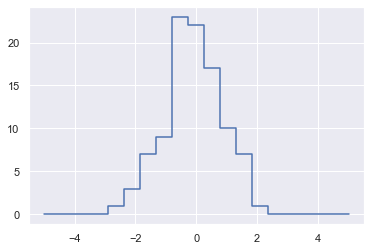

In [53]:
%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.plot(bins, counts, linestyle = 'steps')

$$\text{图2-9：手动计算的直方图}$$

当然，如果每次需要画直方图你都要这么做的话，也是很不明智的。这就是为什么Matplotlib提供了plt.hist()方法，该方法仅用一行代码就实现了上述功能： 

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

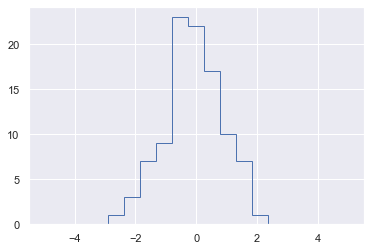

In [54]:
plt.hist(x, bins, histtype = 'step')

这个函数将生成一个和图2-9几乎一模一样的图。为了计算区间，Matplotlib将使用np.histogram函数，该函数的计算功能也和上面执行的计算类似。接下来比较一下这两种方法：  

In [55]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
24.1 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
12.2 µs ± 68.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


可以看到，我们一行代码的算法比Numpy优化过的算法快好几倍！这时如何做到的呢？如果你深入np.histogram源代码(可以在IPython中输入np.histogram??查看源代码)，就会看到它比我们前面用过的简单的搜索和计数方法更复杂。这是由于NumPy的算法更灵活(需要适应不同场景)，因此在数据点比较大时更能显示出其良好性能：   

In [56]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56.5 ms ± 529 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
93.7 ms ± 849 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


以上比较表明，算法效率并不是一个简单的问题。一个对大数据集非常有效的算法并不总是小数据集的最佳选择，反之同理(详情参见2.8.3节)。但是自己编写这个算法的好处是可以理解这些基本方法。你可以利用这些编写好的模块去扩展，以实现一些有意思的自定义操作。将Python有效地用于数据密集型应用中的关键是，当应用场景合适时知道使用np.histogram这样的现成函数，当需要执行更多指定的操作时也知道如何利用更低级的功能来实现。   

## 2.8 数组测排序   

到目前为止，我们主要关注了用NumPy获取或操作数组的工具。这一节将介绍用于排序NumPy数组的相关算法，这些算法是计算机科学导论课程非常偏爱的话题。如果你曾经参加过这样的课程，你可能睡觉时都在想插入排序、选择排序、归并排序、快速排序、冒泡排序等(这取决于你的体温，也可能是一个噩梦)。所有这些方法都是为了实现一个类似的任务：对一个列表或数组进行排序。   
例如，一个简单的选择排序车农夫寻找列表中的最小值，并且不断交换直到列表是有序的。可以在Python中仅用几行代码来实现：   

In [57]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
    
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

正如任何大学一年级的计算机科学课程都会告诉你的，选择排序因为其简洁而非常有用，但是它对于大数组来说太慢了。对于一个包含N个值的数组来说，它需要做N个循环，每个循环中执行`~`N次比较，以找到交换值。"大O标记"常用来标示算法的复杂度(详情参见2.8.3节)，选择排序的平均算法复杂度为${\cal{O}}[N^2]$：如果你讲列表中元素的个数翻倍，那么运行时间就会延长4倍。   
即便如此，选择排序都比我自己最喜欢的bogosort排序算法的性能要好： 

In [58]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
    
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

这个很傻的算法的实现完全是碰运气：它不断对数组元素进行随机重排，直到成为有序数组为止。这个算法的复杂度为${\cal{O}}[N\times N!]$(N乘以N的阶乘)。很明显，这种方法是永远不会用于任何 实际运算场景的。   
幸运的是，Python包含的很多内置排序算法都比上面例子中的算法高效得多。首先介绍Python的内置排序算法，然后介绍NumPy中的排序算法和优化过的NumPy数组排序算法。   

### 2.8.1 NumPy中的快速排序：np.sort和np.argsort    

尽管Python有内置的sort和sorted函数可以对列表进行排序，但是这里不会介绍着两个函数，因为NumPy的np.sort函数实际上效率更高。默认情况下，np.sort的排序算法是快速排序，其算法复杂度为${\cal{O}}[N\log N$，另外也可以选择归并排序和堆排序。对于大多数应用场景，默认的快速排序已经足够高效了。    
如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用np.sort：

In [59]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

如果希望用拍好序的数组替代原始数组，可以使用数组的sort方法：

In [60]:
x.sort()
print(x)

[1 2 3 4 5]


另外一个相关的函数是argsort，该函数返回的是原始数组排好序的索引值：  

In [61]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


以上结构的第一个元素是数组中最小元素的索引值，第二个值给出的是次小元素的索引值，以此类推。这些索引值可以被用于(通过花式索引)创建有序的数组：

In [62]:
x[i]

array([1, 2, 3, 4, 5])

**沿着行或列排序**   
NumPy排序算法的一个有用的功能是通过axis参数，沿着多维数组的行或列进行排序，例如： 

In [63]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [64]:
# 对X的第一列排序
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [65]:
# 对X每一行排序
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

需要记住的是，这种处理方式是将行或列当成独立的数组，任何行或列之间的关系将会丢失！

### 2.8.2 部分排序：分隔   

有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K小的值，NumPy的np.partition函数提供了该功能。np.partition函数的输入是数组和数字K，输出结果是一个新数组，最左边是第K小的值，往右是任意顺序的其他值：   

In [66]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

请注意，结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值。在这两个分隔区间中，元素是任意排列的。   
与排序类似，也可以沿着多维数组的任意的轴进行分隔：    

In [67]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))

np.partition(X, 2, axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分布在剩下的位置。   
最后，正如np.argsort函数计算的是排序的索引值，也有一个np.argpartition函数计算的是分隔的索引值，我们将在下一节中举例介绍它。

### 2.8.3 示例：K个最近邻   

以下示例展示的是如何利用argsort函数沿着多个轴快速找到集合中每个点的最近邻。首先，在二维平面上创建一个有10个随机点的集合。按照惯例，将这些数据点放在一个$10\times2$的数组中：  

In [68]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.rand(10, 2)
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

为了对这些点有个直观的印象，来画出它的散点图(如图2-10所示)： 

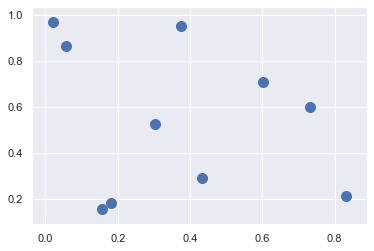

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s = 100)

$$\text{图2-10：将示例$k$个最近邻中的点可视化}$$

现在来计算两两数据点对间的距离。我们学过两点间距离的平方等于每个维度的距离差的平方和。利用NumPy的广播(见2.5节)和聚合(见2.4节)功能，可以利用一行代码计算矩阵的平方距离：    

In [70]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)
dist_sq

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216],
       [0.67933117, 0.52769893, 0.        , 0.51394921, 0.50290096,
        0.68080058, 0.46072414, 0.00141727, 0.15795558, 0.09442377],
       [0.10729142, 0.52572083, 0.51394921, 0.        , 0.31987984,
        0.01216687, 1.02713477, 0.48148903, 0.17716149, 0.47033641],
       [0.11021119, 0.02910074, 0.50290096, 0.31987984, 0.        ,
        0.40557444, 0.29926414, 0.45108072, 0.12173825, 0.20237694],
       [0.12565305, 0.64393098, 0.68080058, 0.01216687, 0.40557444,
        0.        , 1.23302708, 0.64458914, 0.27862329, 0.62982499],
       [0.75487265, 0.1593326 , 0.46072414, 1.02713477, 0.29926414,
        1.23302708, 0.        , 0.42414057, 0.37660024, 0.16662198],
       [0.62590345, 0.47512176, 0.0014172

这个操作有很多部分组成。如果你对NumPy的广播规则不熟悉的话，可能这行diam看起来有些令人困惑。当你遇到这种代码时，将其各部分分解后再分析是非常有用的：   

In [71]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [72]:
# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [73]:
# 将差值求和获得平方距离
sq_differences = differences ** 2

dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

请再次确认以上步骤，应该看到该矩阵的对角线(也就是每个点到自身的距离)的值都是0： 

In [74]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

结果确实是这样的！当我们有了一个转化为两点间的平方距离的矩阵后，就可以使用np.argsort函数沿着每行进行排序了。最左边的列给出的索引值就是最近邻：   

In [75]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


需要注意的是，第一列是按0`~`9从小到大排列的。这是因为每个点的最近邻是其自身，所以结果也正如我们所想。   
如果使用全排序，我们实际上可以实现的比这个例子展示的更多。如果我们仅仅关心$k$个最近邻，那么唯一需要做的是分隔每一行，这样最小的$k+1$的平方距离将排在最前面，其他更长的距离占据矩阵该行的其他位置。可以用np.argpartition函数实现：   

In [76]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)
nearest_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]], dtype=int64)

为了将邻节点网络可视化，我们将每个点和其最近的两个最近邻连接(如图2-11所示)：

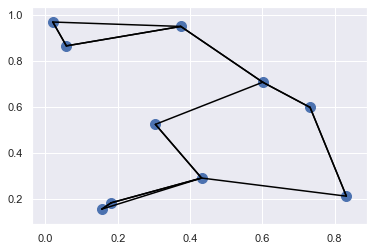

In [77]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

# 将每个点与它的两个最近邻连接
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, : K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现
        plt.plot(*zip(X[j], X[i]), color = 'black')

$$\text{图2-11：每个点的邻节点的可视化}$$

图中每个点和离他最近的两个节点用连线连接。乍一看，你可能会奇怪为什么有些点的连线多于两条，这是因为点A和点B最近邻的两个节点之一，但是并不意味着点B一定是点A的最邻近的两个节点之一。   
尽管本例中的广播和按行排序可能看起来不如循环直观，但是在实际运行中，Python中这类数据的操作会更高效。你可能会尝试通过手动循环数据并对每一组邻节点单独进行排序来实现同样的功能，但是这种方法和我们使用的向量化操作相比，肯定在算法执行上效率更低。并且向量化操作的优美之处在于，它的实现方式决定了它对输入数据的数据量并不敏感。也就是说，我们可以非常轻松地计算任意维度空间的100或1000000个邻节点，而代码看起来是一样的。   
最后还想提醒一点，做大数据量的最近邻搜索时，有几种基于树的算法的算法复杂度可以实现接近${\cal{O}}[N\log N]$，或者比暴力搜索法${\cal{O}}[N^2]$更好。其中一种就是KD-Tree，在Scikit-Learn(<http://bit.ly/2fSpdx>)中实现。

## 2.9 结构化数据：NumPy的结构化数组   

大多数时候，我们的数据可以通过一个异构类型值组成的数组表示，但有时却并非如此。本节介绍NumPy的结构化数组和记录数组，它们为复合的、异构的数据提供了非常有效的存储。尽管这里列举的恶魔是对于简单的操作非常有用，但是这些场景通常也可以用Pandas的DataFrame来实现(将在第三章详细介绍)。   
假定现在有关于一些人的分类数据(如姓名、年龄和体重)，我们需要存储这些数据用于Python项目，那么一种可行的方法是将它们存在三个单独的数组中：   

In [78]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

但是这种方法有点笨，因为没有任何信息告诉我们这三个数组是相关联的。如果可以用一种单一结构来存储所有的数据，那么看起来会更自然。NumPy可以用结构化数组实现这种存储，这些结构hausman数组是复合数据类型的。   
前面介绍过，利用以下表达式可以生成一个简单的数组：   

In [79]:
x = np.zeros(4, dtype = int)

与之类似，通过指定复合数据类型，可以构造一个结构化数组： 

In [80]:
# 使用符合数据的的结构化数组
data = np.zeros(4, dtype = {'names' : ('name', 'age', 'weight'),
                            'formats' : ('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


这里U10表示"长度不超过10的Unicode字符"，i4表示"4字节(即32比特)整型"，f8表示"8字节(即64比特)浮点型"。后续的小节中将介绍更多的数据类型代码。   
现在生成一个空的数组容器，可以将列表放入数组中：   

In [81]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


正如我们希望的，所有的数据都被安排在一个内存块中。   
结构化数组的方便之处在于，你可以通过索引或名称查看相应的值：   

In [82]:
# 获取所有名字
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [83]:
# 获取数据第一行
data[0]

('Alice', 25, 55.)

In [84]:
# 获取最后一行的名字
data[-1]['name']

'Doug'

利用布尔掩码，还可以做一些更复杂的操作，如按照年龄进行筛选：

In [85]:
# 获取你那里小于30岁的人的名字
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

请注意，如果你希望实现上面更复杂的操作，那么你应该考虑使用Pandas包，我们将在下一章中详细介绍它。正如你将会看到的，Pandas提供了一个DataFrame对象，该结构是构建于NumPy数组之上的，提供了很多有用的数据操作功能，其中有些与前面介绍的类似，当然也有更多没提过并且非常实用的功能。   

### 2.9.1 生成结构化数组    

结构化数组的数据类型由多种指定方式。此前我们看过了采用字典的方法：

In [86]:
np.dtype({'names' : ('name', 'age', 'weight'),
          'formats' : ('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

为了简明起见，数值数据类型可以用Python类型或NumPy的dtype类型指定： 

In [87]:
np.dtype({'names' : ('name', 'age', 'weight'),
          'formats' : ((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

复合类型也可以是元组列表：

In [88]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

如果类型的名称对你来说并不重要，那你可以仅仅用一个字符串来指定它。在该字符串中数据类型用逗号分隔：

In [89]:
np.dtype('S10, i4, f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

简写的字符串格式的代码可能看起来令人困惑，但是它们其实基于非常简单的规则。第一个(可选)字符是<或者>，分别表示"低字节序"(little endian)和"高字节序"(bid endian)，表示字节(bytes)类 型的数据在内存中存放顺序的习惯用法。后一个字符指定的是数据的类型：字符、字节、整型、浮点型，等等(如表2-4所示)：   
$$
\text{表2-4：NumPy的数据类型}   \\
\begin{array}{l|l|l}
\hline
\text{NumPy数据类型符号} & \text{描述} & \text{示例}  \\
\hline
\text{'b'} & \text{字节型} & \text{np.dtype('b')}  \\
\text{'i'} & \text{有符号整型} & \text{np.dtype('i4') == np.int32}  \\
\text{'u'} & \text{无符号整型} & \text{np.dtype('u1') == np.uint8}  \\
\text{'f'} & \text{浮点型} & \text{np.dtype('f8') == np.float64}  \\
\text{'c'} & \text{复数浮点型} & \text{np.dtype('c16') == np.complex128}  \\
\text{'S'、'a'} & \text{字符串} & \text{np.dtype('55')}  \\
\text{'U'} & \text{Unicode编码字符串} & \text{np.dtype('U') == np.str_}  \\
\text{'V'} & \text{原生数据，rawdata(空，void)} & \text{np.dtype('V') = np.void}  \\
\hline
\end{array}
$$  

### 2.9.2 更高级的复合类型    

NumPy中也可以定义更高级的复合数据类型，例如，你可以创建一种类型，其中每个元素都包含一个数组或矩阵。我们会创建一个数据类型，该数据类型用mat组件包含一个$3\times3$的浮点矩阵：   

In [90]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype = tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


现在X数组的每个元素都包含了一个id和一个$3\times3$的矩阵。为什么我们宁愿用这种方法存储数据，也不用简单的多维数组，或者Python字典呢？原因是NumPy的dtype直接映射到C结构的定义，因此包含数组内容的缓存可以直接在C程序中使用。如果你先给写个Python接口与一个遗留的C语言或Fortran库交互，从而操作结构化数据，你将会发现结构化数组非常有用。   

### 2.9.3 记录数组：结构化数组的扭转   

NumPy还提供了np.recarray类。它和前面介绍的结构化数组几乎相同，但是它有一个独特的特征：域可以像属性一样获取，而不是像字典的键那样获取。前面的例子通过以下代码获取年龄：   

In [91]:
data['age']

array([25, 45, 37, 19])

如果将这些数据当作一个记录数组，我们可以用很少的按键来获取这个结果：  

In [92]:
data_rec = data.view(np.recarray)
data_rec

rec.array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
           ('Doug', 19, 61.5)],
          dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

记录数组的不好的地方在于，即使使用同样的语法，在获取域时也会有一些额外的开销，如以下示例所示：   

In [93]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

134 ns ± 3.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.66 µs ± 83 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.16 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


是否值得为更简便的标记方式花费额外的开销，这取决于你的实际应用。